## TP 05: Convolucion

In [1]:
from skimage import data, io, filters
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from scipy import misc
from skimage.util.dtype import dtype_range
import seaborn as sns
import matplotlib.image as mpimg

# Importamos las imagenes a utilizar

In [2]:
pwd

'/home/human/Dropbox/doctorado/chapter00_courses/procesamiento_digital_imagenes'

In [3]:
img1 = rgb2gray(io.imread('/home/human/Dropbox/doctorado/chapter00_courses/procesamiento_digital_imagenes/planetario.jpg'))
img2 = rgb2gray(io.imread('/home/human/Dropbox/doctorado/chapter00_courses/procesamiento_digital_imagenes/totem.jpg'))

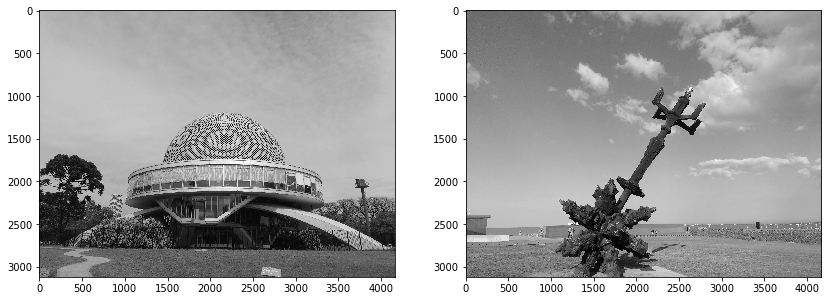

In [4]:
f, axarr = plt.subplots(1,2)
f.set_size_inches(14, 8)
axarr[0].imshow(img1, cmap=plt.cm.gray)
axarr[1].imshow(img2, cmap=plt.cm.gray)
axarr[0].grid(False)
axarr[1].grid(False)
plt.show()

# Definicion Convolución para cualquier kernel

In [7]:
def convolucion(img, kernel):
    # Definimos el margen del kernel
    margenk = int(np.floor(np.shape(kernel)[0]/2))
    img_conv = np.zeros((np.shape(img)[0]+2*margenk,np.shape(img)[1]+2*margenk))
    
    # img_conv contendra la imagen original + los pixeles repetidos en los limites borde
    img_conv[margenk:-margenk, margenk:-margenk] = img.copy()
    
    # replicamos los margenes para que el kernel pueda barrer los limites de la imagen
    for margenx in range(margenk):
        img_conv[margenx,:] = img_conv[margenk,:]
        img_conv[img_conv.shape[0]-margenx-1,:] = img_conv[img_conv.shape[0]-margenk-1,:]

    for margeny in range(margenk):
        img_conv[:, margeny] = img_conv[:,margenk]
        img_conv[:, img_conv.shape[1]-margeny-1] = img_conv[:,img_conv.shape[1]-margenk-1]
        
    kersize = np.shape(kernel)
    img_postconv = np.zeros((np.shape(img)[0],np.shape(img)[1]))
    # aplicamos convolucion a toda la imagen
    for i in range(margenk, np.shape(img)[0]):
        for j in range(margenk, np.shape(img)[1]):
            conv_read = img_conv[(i-margenk):(i+margenk+1), (j-margenk):(j+margenk+1)]
            img_postconv[i-margenk, j-margenk] = np.sum(np.multiply(conv_read, kernel))
    
    return img_postconv

# Filtro por convolucion pasabajos: Plano

Definimos Kernel Plano

In [168]:
def kernel_plano(size):
    kern = np.ones((size,size))/(size*size)
    return kern

Aplicamos Kernel Plano a las 2 imagenes con el tamaño de kernel 3,5 y 7.

In [10]:
img1_conv_plano3x3 = convolucion(img1, kernel_plano(3))
img2_conv_plano3x3 = convolucion(img2, kernel_plano(3))

img1_conv_plano5x5 = convolucion(img1, kernel_plano(5))
img2_conv_plano5x5 = convolucion(img2, kernel_plano(5))

img1_conv_plano7x7 = convolucion(img1, kernel_plano(7))
img2_conv_plano7x7 = convolucion(img2, kernel_plano(7))

Imprimimos en pantalla las imagenes originales y sus correspondientes luego de aplicar el filtro.

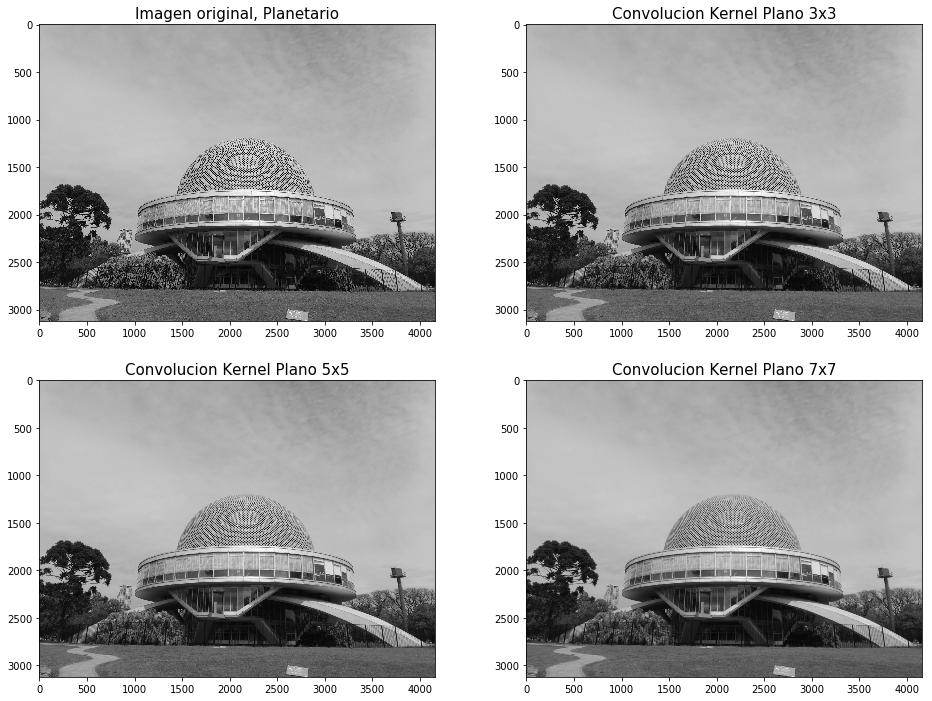

In [22]:
f, axarr = plt.subplots(2,2)
f.set_size_inches(16, 12)
axarr[0,0].imshow(img1, cmap=plt.cm.gray)
axarr[0,0].set_title("Imagen original, Planetario", fontsize=15)
axarr[0,1].imshow(img1_conv_plano3x3, cmap=plt.cm.gray)
axarr[0,1].set_title("Convolucion Kernel Plano 3x3", fontsize=15)
axarr[1,0].imshow(img1_conv_plano5x5, cmap=plt.cm.gray)
axarr[1,0].set_title("Convolucion Kernel Plano 5x5", fontsize=15)
axarr[1,1].imshow(img1_conv_plano7x7, cmap=plt.cm.gray)
axarr[1,1].set_title("Convolucion Kernel Plano 7x7", fontsize=15)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[1,0].grid(False)
axarr[1,1].grid(False)
plt.show()

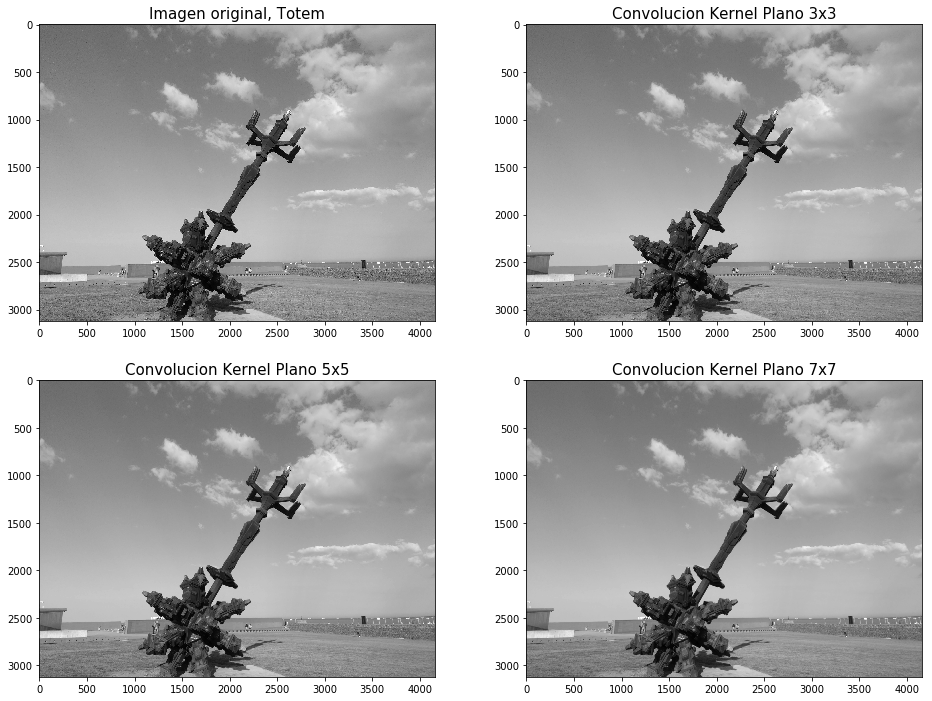

In [23]:
f, axarr = plt.subplots(2,2)
f.set_size_inches(16, 12)
axarr[0,0].imshow(img2, cmap=plt.cm.gray)
axarr[0,0].set_title("Imagen original, Totem", fontsize=15)
axarr[0,1].imshow(img2_conv_plano3x3, cmap=plt.cm.gray)
axarr[0,1].set_title("Convolucion Kernel Plano 3x3", fontsize=15)
axarr[1,0].imshow(img2_conv_plano5x5, cmap=plt.cm.gray)
axarr[1,0].set_title("Convolucion Kernel Plano 5x5", fontsize=15)
axarr[1,1].imshow(img2_conv_plano7x7, cmap=plt.cm.gray)
axarr[1,1].set_title("Convolucion Kernel Plano 7x7", fontsize=15)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[1,0].grid(False)
axarr[1,1].grid(False)
plt.show()

# Filtro por convolucion pasabajos: Bartlett

Definimos el Kernel Bartlett

In [122]:
def kernel_bartlett(size):
    if size % 2 == 0:
        return print("El numero es par. No es posible computar el Kernel") 
    else:
        
        kern = np.zeros((size,size))
        peak = np.floor(size/2)
        r = 0
        for t in range(0,size):
                if t <= peak:
                    kern[t,0] = (r+1)
                    r =r+1
                else:
                    kern[t,0] = (r-1)
                    r = r-1

        for q in range(1,size):
            if q <= peak:
                    kern[:,q] = (q+1)*kern[:,0]

            else:
                    kern[:,q] = (peak+1-(q-peak))*kern[:,0]
        kern_out = kern/np.sum(kern)
        return kern_out

Imprimimos en pantalla una muestra del Kernel Bartlett de 5x5

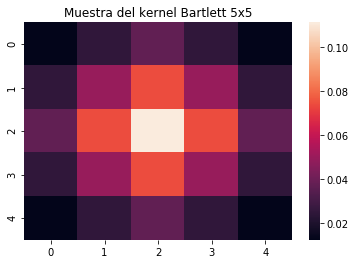

In [230]:
sns.heatmap(kernel_bartlett(5))
plt.title("Muestra del kernel Bartlett 5x5")
plt.show()

Aplicamos Kernel Bartlett a las 2 imagenes con el tamaño de kernel 3,5 y 7.

In [123]:
img1_conv_bart3x3 = convolucion(img1, kernel_bartlett(3))
img2_conv_bart3x3 = convolucion(img2, kernel_bartlett(3))

img1_conv_bart5x5 = convolucion(img1, kernel_bartlett(5))
img2_conv_bart5x5 = convolucion(img2, kernel_bartlett(5))

img1_conv_bart7x7 = convolucion(img1, kernel_bartlett(7))
img2_conv_bart7x7 = convolucion(img2, kernel_bartlett(7))

Imprimimos en pantalla las imagenes originales y sus correspondientes luego de aplicar el filtro Bartlett.

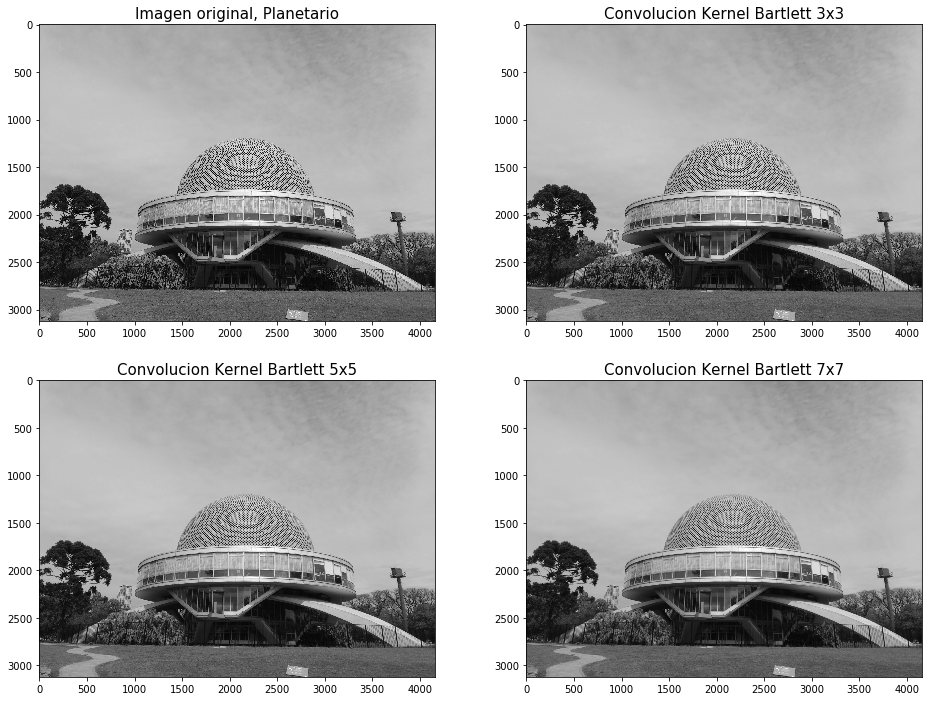

In [125]:
f, axarr = plt.subplots(2,2)
f.set_size_inches(16, 12)
axarr[0,0].imshow(img1, cmap=plt.cm.gray)
axarr[0,0].set_title("Imagen original, Planetario", fontsize=15)
axarr[0,1].imshow(img1_conv_bart3x3, cmap=plt.cm.gray)
axarr[0,1].set_title("Convolucion Kernel Bartlett 3x3", fontsize=15)
axarr[1,0].imshow(img1_conv_bart5x5, cmap=plt.cm.gray)
axarr[1,0].set_title("Convolucion Kernel Bartlett 5x5", fontsize=15)
axarr[1,1].imshow(img1_conv_bart7x7, cmap=plt.cm.gray)
axarr[1,1].set_title("Convolucion Kernel Bartlett 7x7", fontsize=15)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[1,0].grid(False)
axarr[1,1].grid(False)
plt.show()

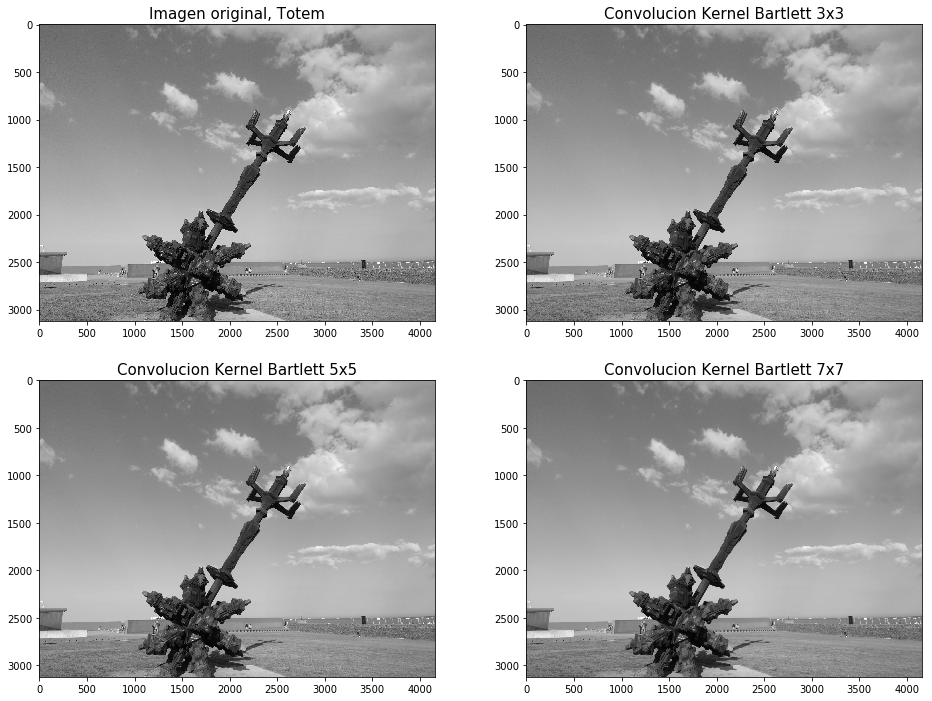

In [126]:
f, axarr = plt.subplots(2,2)
f.set_size_inches(16, 12)
axarr[0,0].imshow(img2, cmap=plt.cm.gray)
axarr[0,0].set_title("Imagen original, Totem", fontsize=15)
axarr[0,1].imshow(img2_conv_bart3x3, cmap=plt.cm.gray)
axarr[0,1].set_title("Convolucion Kernel Bartlett 3x3", fontsize=15)
axarr[1,0].imshow(img2_conv_bart5x5, cmap=plt.cm.gray)
axarr[1,0].set_title("Convolucion Kernel Bartlett 5x5", fontsize=15)
axarr[1,1].imshow(img2_conv_bart7x7, cmap=plt.cm.gray)
axarr[1,1].set_title("Convolucion Kernel Bartlett 7x7", fontsize=15)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[1,0].grid(False)
axarr[1,1].grid(False)
plt.show()

# Filtro por convolucion pasabajos: Kernel de Gauss

Defino el triangulo de pascal.

In [133]:
def pascal_triangle(size):
    row= [1]
    y = [0]
    for x in range(max(size-1,0)):      
        row=[left+right for left,right in zip(row+y, y+row)]

    return row

Defino el Kernel de Gauss

In [148]:
def kernel_gaussian(size):
    if size % 2 == 0:
        return print("El numero es par. No es posible computar el Kernel") 
    else:
        
        rowcol0 = pascal_triangle(size)
        kern = np.zeros((size,size))
        kern[:,0] = rowcol0
        kern[0,:] = rowcol0
        kern[:,-1] = rowcol0
        kern[-1,:] = rowcol0

        for i in range(1,size-1):
            for j in range(1,size-1):
                kern[i,j] = kern[i,0]*kern[0,j]
        
        return kern/np.sum(kern)

Muestra del kernel de Gauss 5x5

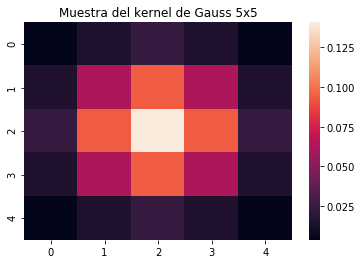

In [231]:
sns.heatmap(kernel_gaussian(5))
plt.title("Muestra del kernel de Gauss 5x5")
plt.show()

Aplicamos filtro por convolucion con Kernel de Gauss a las 2 imagenes con el tamaño de kernel 3,5 y 7.

In [149]:
img1_conv_gauss3x3 = convolucion(img1, kernel_gaussian(3))
img2_conv_gauss3x3 = convolucion(img2, kernel_gaussian(3))

img1_conv_gauss5x5 = convolucion(img1, kernel_gaussian(5))
img2_conv_gauss5x5 = convolucion(img2, kernel_gaussian(5))

img1_conv_gauss7x7 = convolucion(img1, kernel_gaussian(7))
img2_conv_gauss7x7 = convolucion(img2, kernel_gaussian(7))

Imprimimos en pantalla las imagenes originales y sus correspondientes luego de aplicar el filtro de Gauss.

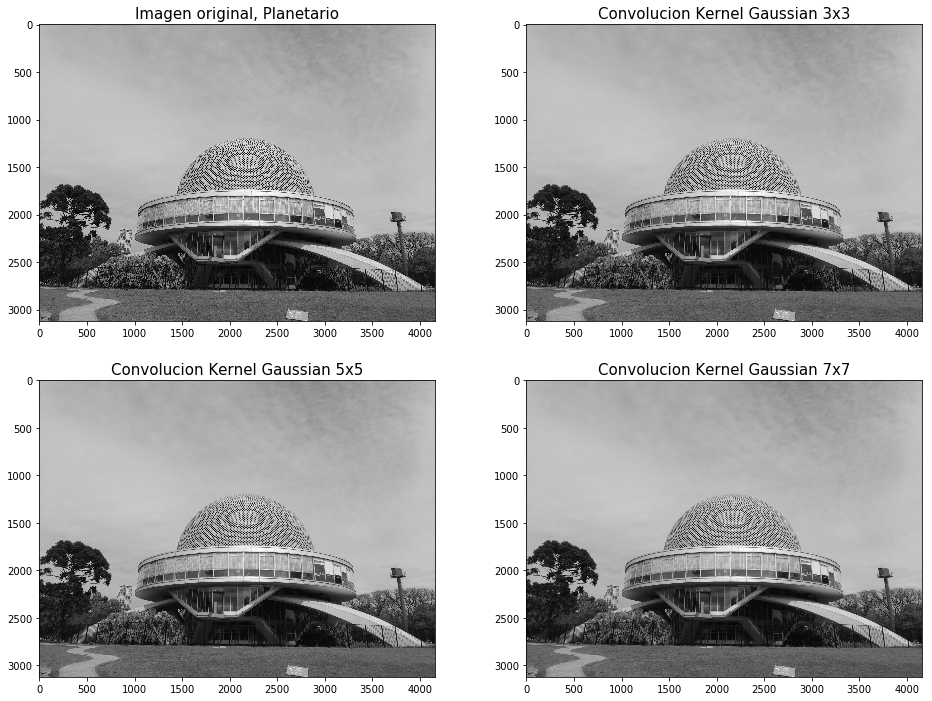

In [150]:
f, axarr = plt.subplots(2,2)
f.set_size_inches(16, 12)
axarr[0,0].imshow(img1, cmap=plt.cm.gray)
axarr[0,0].set_title("Imagen original, Planetario", fontsize=15)
axarr[0,1].imshow(img1_conv_gauss3x3, cmap=plt.cm.gray)
axarr[0,1].set_title("Convolucion Kernel Gaussian 3x3", fontsize=15)
axarr[1,0].imshow(img1_conv_gauss5x5, cmap=plt.cm.gray)
axarr[1,0].set_title("Convolucion Kernel Gaussian 5x5", fontsize=15)
axarr[1,1].imshow(img1_conv_gauss7x7, cmap=plt.cm.gray)
axarr[1,1].set_title("Convolucion Kernel Gaussian 7x7", fontsize=15)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[1,0].grid(False)
axarr[1,1].grid(False)
plt.show()

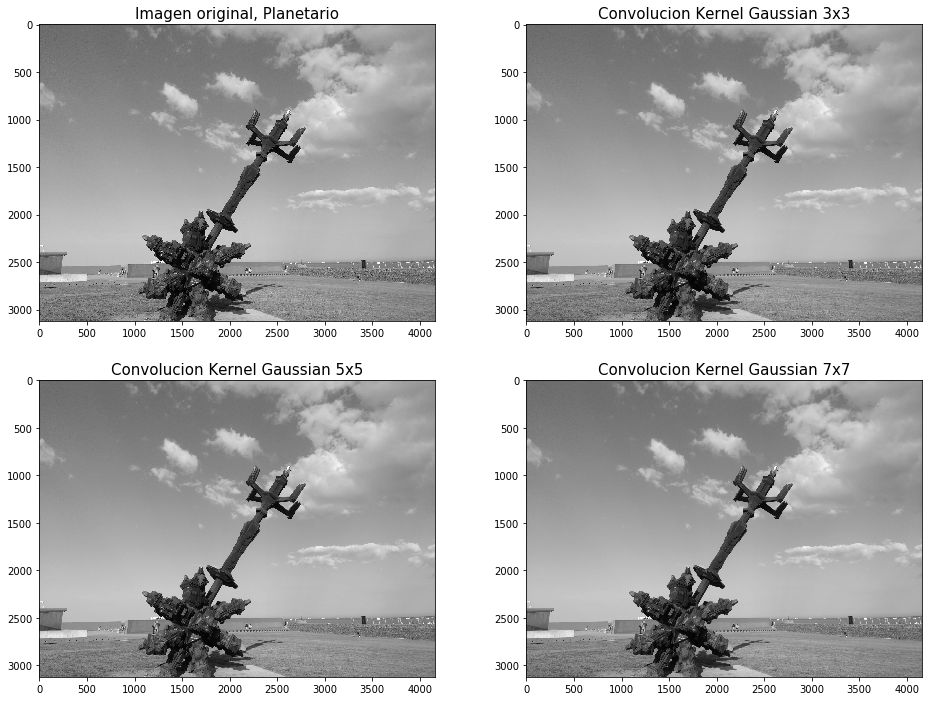

In [151]:
f, axarr = plt.subplots(2,2)
f.set_size_inches(16, 12)
axarr[0,0].imshow(img2, cmap=plt.cm.gray)
axarr[0,0].set_title("Imagen original, Planetario", fontsize=15)
axarr[0,1].imshow(img2_conv_gauss3x3, cmap=plt.cm.gray)
axarr[0,1].set_title("Convolucion Kernel Gaussian 3x3", fontsize=15)
axarr[1,0].imshow(img2_conv_gauss5x5, cmap=plt.cm.gray)
axarr[1,0].set_title("Convolucion Kernel Gaussian 5x5", fontsize=15)
axarr[1,1].imshow(img2_conv_gauss7x7, cmap=plt.cm.gray)
axarr[1,1].set_title("Convolucion Kernel Gaussian 7x7", fontsize=15)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[1,0].grid(False)
axarr[1,1].grid(False)
plt.show()

# Detector de bordes: Laplaciano

Se define el kernel Laplaciano para 4 y 8 vecinos

In [160]:
def kernel_laplacian(vecinos):

    if vecinos == 4:
        kern = [[0,-1,0],[-1,4,-1],[0,-1,0]]
        
    if vecinos == 8:
        kern = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]
        
    return kern

Muestra del Kernel Laplaciano de 4 vecinos.

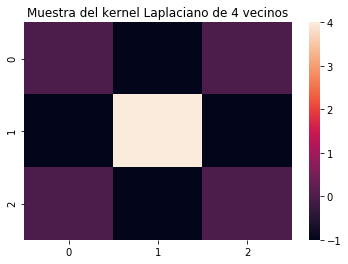

In [232]:
sns.heatmap(kernel_laplacian(4))
plt.title("Muestra del kernel Laplaciano de 4 vecinos")
plt.show()

Aplicamos filtrado por convolucion con Kernel Laplaciano a las 2 imagenes con 4 y 8 vecinos.

In [166]:
# Realizamos filtrado con kernel Laplaciano con 4 vecinos
img1_conv_lapla_4 = convolucion(img1, kernel_laplacian(4))
img2_conv_lapla_4 = convolucion(img2, kernel_laplacian(4))

# Realizamos filtrado con kernel Laplaciano con 8 vecinos
img1_conv_lapla_8 = convolucion(img1, kernel_laplacian(8))
img2_conv_lapla_8 = convolucion(img2, kernel_laplacian(8))

Nos aseguramos que las imagenes no se salgan del rango permitido de valores de pixel.

In [173]:
# coercionamos los valores de los pixeles entre 0 y 1

img1_conv_lapla_4[img1_conv_lapla_4[:,:] >1] = 1
img1_conv_lapla_4[img1_conv_lapla_4[:,:] <0] = 0

img2_conv_lapla_4[img2_conv_lapla_4[:,:] >1] = 1
img2_conv_lapla_4[img2_conv_lapla_4[:,:] <0] = 0

img1_conv_lapla_8[img1_conv_lapla_8[:,:] >1] = 1
img1_conv_lapla_8[img1_conv_lapla_8[:,:] <0] = 0

img2_conv_lapla_8[img2_conv_lapla_8[:,:] >1] = 1
img2_conv_lapla_8[img2_conv_lapla_8[:,:] <0] = 0

Imprimimos en pantalla las imagenes originales y sus correspondientes luego de aplicar el filtro Laplaciano.

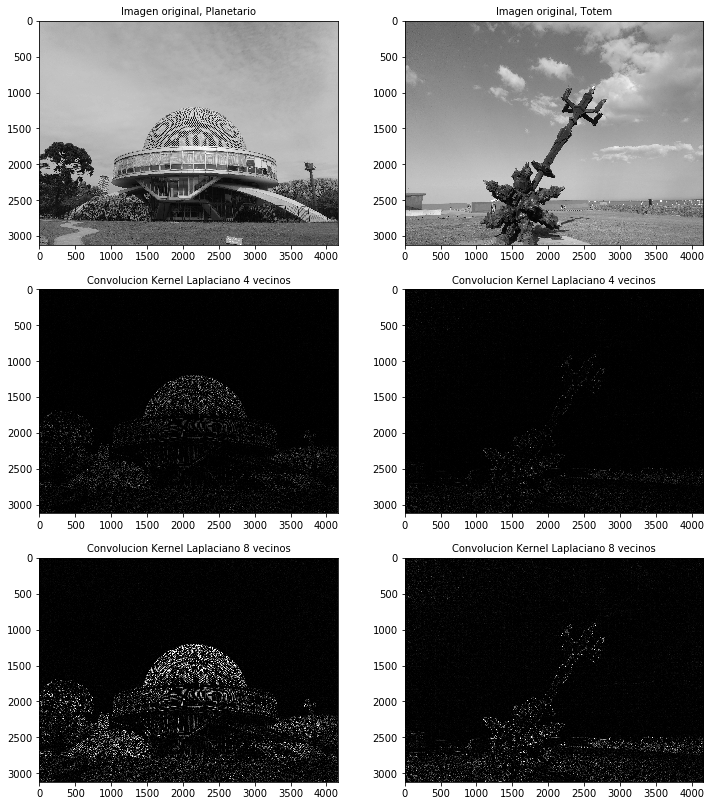

In [201]:
f, axarr = plt.subplots(3,2)
f.set_size_inches(12, 14)
axarr[0,0].imshow(img1, cmap=plt.cm.gray)
axarr[0,0].set_title("Imagen original, Planetario", fontsize=10)
axarr[0,1].imshow(img2, cmap=plt.cm.gray)
axarr[0,1].set_title("Imagen original, Totem", fontsize=10)
axarr[1,0].imshow(img1_conv_lapla_4, cmap=plt.cm.gray)
axarr[1,0].set_title("Convolucion Kernel Laplaciano 4 vecinos", fontsize=10)
axarr[1,1].imshow(img2_conv_lapla_4, cmap=plt.cm.gray)
axarr[1,1].set_title("Convolucion Kernel Laplaciano 4 vecinos", fontsize=10)
axarr[2,0].imshow(img1_conv_lapla_8, cmap=plt.cm.gray)
axarr[2,0].set_title("Convolucion Kernel Laplaciano 8 vecinos", fontsize=10)
axarr[2,1].imshow(img2_conv_lapla_8, cmap=plt.cm.gray)
axarr[2,1].set_title("Convolucion Kernel Laplaciano 8 vecinos", fontsize=10)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[1,0].grid(False)
axarr[1,1].grid(False)
axarr[2,0].grid(False)
axarr[2,1].grid(False)
plt.show()

# Detector de bordes: Laplaciano Mejorado

Definimos el kernel Laplaciano mejorado sumando al kernel identidad un porcentaje del laplaciano (en este caso 0.2)

In [189]:
def kernel_laplacian_mejorado(vecinos, porcentaje):

    if vecinos == 4:
        kern = [[0.0,-1.0,0.0],[-1.0,4.0,-1.0],[0.0,-1.0,0.0]]
        
    if vecinos == 8:
        kern = [[-1.0,-1.0,-1.0],[-1.0,8.0,-1.0],[-1.0,-1.0,-1.0]]
    
    return ([[0.0,0.0,0.0],[0.0,1.0,0.0],[0.0,0.0,0.0]]+(kern*np.full((3,3),porcentaje)))

Aplicamos filtrado por convolucion con Kernel Laplaciano mejorado con 0.2 de factor multiplicador a las 2 imagenes con 4 y 8 vecinos.

In [190]:
# Realizamos filtrado con kernel Laplaciano con 4 vecinos
img1_conv_lapla_4_mejorado = convolucion(img1, kernel_laplacian_mejorado(4, 0.2))
img2_conv_lapla_4_mejorado = convolucion(img2, kernel_laplacian_mejorado(4,0.2))

# Realizamos filtrado con kernel Laplaciano con 8 vecinos
img1_conv_lapla_8_mejorado = convolucion(img1, kernel_laplacian_mejorado(8,0.2))
img2_conv_lapla_8_mejorado = convolucion(img2, kernel_laplacian_mejorado(8,0.2))

Nos aseguramos que las imagenes no se salgan del rango permitido de valores de pixel.

In [195]:
# coercionamos los valores de los pixeles entre 0 y 1

img1_conv_lapla_4_mejorado[img1_conv_lapla_4_mejorado[:,:] >1] = 1
img1_conv_lapla_4_mejorado[img1_conv_lapla_4_mejorado[:,:] <0] = 0

img2_conv_lapla_4_mejorado[img2_conv_lapla_4_mejorado[:,:] >1] = 1
img2_conv_lapla_4_mejorado[img2_conv_lapla_4_mejorado[:,:] <0] = 0

img1_conv_lapla_8_mejorado[img1_conv_lapla_8_mejorado[:,:] >1] = 1
img1_conv_lapla_8_mejorado[img1_conv_lapla_8_mejorado[:,:] <0] = 0

img2_conv_lapla_8_mejorado[img2_conv_lapla_8_mejorado[:,:] >1] = 1
img2_conv_lapla_8_mejorado[img2_conv_lapla_8_mejorado[:,:] <0] = 0

Imprimimos en pantalla las imagenes originales y sus correspondientes luego de aplicar el filtro Laplaciano Mejorado

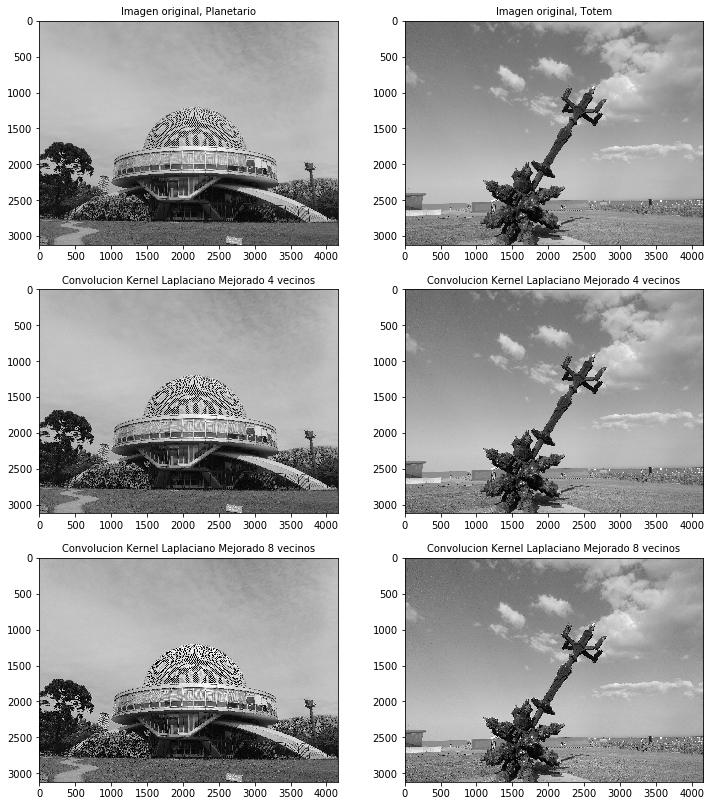

In [200]:
f, axarr = plt.subplots(3,2)
f.set_size_inches(12, 14)
axarr[0,0].imshow(img1, cmap=plt.cm.gray)
axarr[0,0].set_title("Imagen original, Planetario", fontsize=10)
axarr[0,1].imshow(img2, cmap=plt.cm.gray)
axarr[0,1].set_title("Imagen original, Totem", fontsize=10)
axarr[1,0].imshow(img1_conv_lapla_4_mejorado, cmap=plt.cm.gray)
axarr[1,0].set_title("Convolucion Kernel Laplaciano Mejorado 4 vecinos", fontsize=10)
axarr[1,1].imshow(img2_conv_lapla_4_mejorado, cmap=plt.cm.gray)
axarr[1,1].set_title("Convolucion Kernel Laplaciano Mejorado 4 vecinos", fontsize=10)
axarr[2,0].imshow(img1_conv_lapla_8_mejorado, cmap=plt.cm.gray)
axarr[2,0].set_title("Convolucion Kernel Laplaciano Mejorado 8 vecinos", fontsize=10)
axarr[2,1].imshow(img2_conv_lapla_8_mejorado, cmap=plt.cm.gray)
axarr[2,1].set_title("Convolucion Kernel Laplaciano Mejorado 8 vecinos", fontsize=10)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[1,0].grid(False)
axarr[1,1].grid(False)
axarr[2,0].grid(False)
axarr[2,1].grid(False)
plt.show()

# Detector de bordes: Sobel

Definimos el kernel de Sobel para las direcciones horizontal (este,oeste), vertical (norte, sur) y diagonales (no,ne,se,so).

In [204]:
def kernel_sobel(pos):
    if pos == 'norte':
        kernel = np.array([[-1,-2,-1],[ 0, 0, 0],[ 1, 2, 1]])
    if pos == 'noreste':
        kernel =   np.array([[ 0,-1,-2],[ 1, 0,-1],[ 2, 1, 0]])
    if pos == 'noroeste':
        kernel =   np.array([[-2,-1, 0],[-1, 0, 1],[ 0, 1, 2]])
    if pos == 'sur':
        kernel =  np.array([[ 1, 2, 1],[ 0, 0, 0],[-1,-2,-1]])
    if pos == 'sudoeste':
        kernel =   np.array([[ 0, 1, 2],[-1, 0, 1],[-2,-1, 0]])
    if pos == 'sudeste':
        kernel =   np.array([[ 2, 1, 0],[ 1, 0,-1],[ 0,-1,-2]])
    if pos == 'este':
        kernel =  np.array([[ 1, 0,-1], [ 2, 0,-2],[ 1, 0,-1]])
    if pos == 'oeste':
        kernel =  np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return kernel

Aplicamos filtrado por convolucion con Kernel Sobel en direccion horizontal y vertical.

In [205]:
# Realizamos filtrado con kernel Sobel Horizontal y Vertical
img1_conv_sobel_norte = convolucion(img1, kernel_sobel('norte'))
img1_conv_sobel_sur = convolucion(img1, kernel_sobel('sur'))
img1_conv_sobel_este = convolucion(img1, kernel_sobel('este'))
img1_conv_sobel_oeste = convolucion(img1, kernel_sobel('oeste'))

img2_conv_sobel_norte = convolucion(img2, kernel_sobel('norte'))
img2_conv_sobel_sur = convolucion(img2, kernel_sobel('sur'))
img2_conv_sobel_este = convolucion(img2, kernel_sobel('este'))
img2_conv_sobel_oeste = convolucion(img2, kernel_sobel('oeste'))

Aplicamos filtrado por convolucion con Kernel Sobel en direcciones diagonales.

In [ ]:
# Realizamos filtrado con kernel Sobel Diagonal
img1_conv_sobel_no = convolucion(img1, kernel_sobel('noroeste'))
img1_conv_sobel_ne = convolucion(img1, kernel_sobel('noreste'))
img1_conv_sobel_so = convolucion(img1, kernel_sobel('sudoeste'))
img1_conv_sobel_se = convolucion(img1, kernel_sobel('sudeste'))

img2_conv_sobel_no = convolucion(img2, kernel_sobel('noroeste'))
img2_conv_sobel_ne = convolucion(img2, kernel_sobel('noreste'))
img2_conv_sobel_so = convolucion(img2, kernel_sobel('sudoeste'))
img2_conv_sobel_se = convolucion(img2, kernel_sobel('sudeste'))

In [227]:
# coercionamos los valores de los pixeles entre 0 y 1

img1_conv_sobel_norte[img1_conv_sobel_norte[:,:] >1] = 1
img1_conv_sobel_norte[img1_conv_sobel_norte[:,:] <0] = 0
img1_conv_sobel_sur[img1_conv_sobel_sur[:,:] >1] = 1
img1_conv_sobel_sur[img1_conv_sobel_sur[:,:] <0] = 0
img1_conv_sobel_este[img1_conv_sobel_este[:,:] >1] = 1
img1_conv_sobel_este[img1_conv_sobel_este[:,:] <0] = 0
img1_conv_sobel_oeste[img1_conv_sobel_oeste[:,:] >1] = 1
img1_conv_sobel_oeste[img1_conv_sobel_oeste[:,:] <0] = 0

img1_conv_sobel_no[img1_conv_sobel_no[:,:] >1] = 1
img1_conv_sobel_no[img1_conv_sobel_no[:,:] <0] = 0
img1_conv_sobel_ne[img1_conv_sobel_ne[:,:] >1] = 1
img1_conv_sobel_ne[img1_conv_sobel_ne[:,:] <0] = 0
img1_conv_sobel_so[img1_conv_sobel_so[:,:] >1] = 1
img1_conv_sobel_so[img1_conv_sobel_so[:,:] <0] = 0
img1_conv_sobel_se[img1_conv_sobel_se[:,:] >1] = 1
img1_conv_sobel_se[img1_conv_sobel_se[:,:] <0] = 0

img2_conv_sobel_norte[img2_conv_sobel_norte[:,:] >1] = 1
img2_conv_sobel_norte[img2_conv_sobel_norte[:,:] <0] = 0
img2_conv_sobel_sur[img2_conv_sobel_sur[:,:] >1] = 1
img2_conv_sobel_sur[img2_conv_sobel_sur[:,:] <0] = 0
img2_conv_sobel_este[img2_conv_sobel_este[:,:] >1] = 1
img2_conv_sobel_este[img2_conv_sobel_este[:,:] <0] = 0
img2_conv_sobel_oeste[img2_conv_sobel_oeste[:,:] >1] = 1
img2_conv_sobel_oeste[img2_conv_sobel_oeste[:,:] <0] = 0

img2_conv_sobel_no[img2_conv_sobel_no[:,:] >1] = 1
img2_conv_sobel_no[img2_conv_sobel_no[:,:] <0] = 0
img2_conv_sobel_ne[img2_conv_sobel_ne[:,:] >1] = 1
img2_conv_sobel_ne[img2_conv_sobel_ne[:,:] <0] = 0
img2_conv_sobel_so[img2_conv_sobel_so[:,:] >1] = 1
img2_conv_sobel_so[img2_conv_sobel_so[:,:] <0] = 0
img2_conv_sobel_se[img2_conv_sobel_se[:,:] >1] = 1
img2_conv_sobel_se[img2_conv_sobel_se[:,:] <0] = 0

Imprimimos en pantalla las imagenes originales y sus correspondientes luego de aplicar el filtro Sobel Horizontal y Vertical para las 2 imagenes.

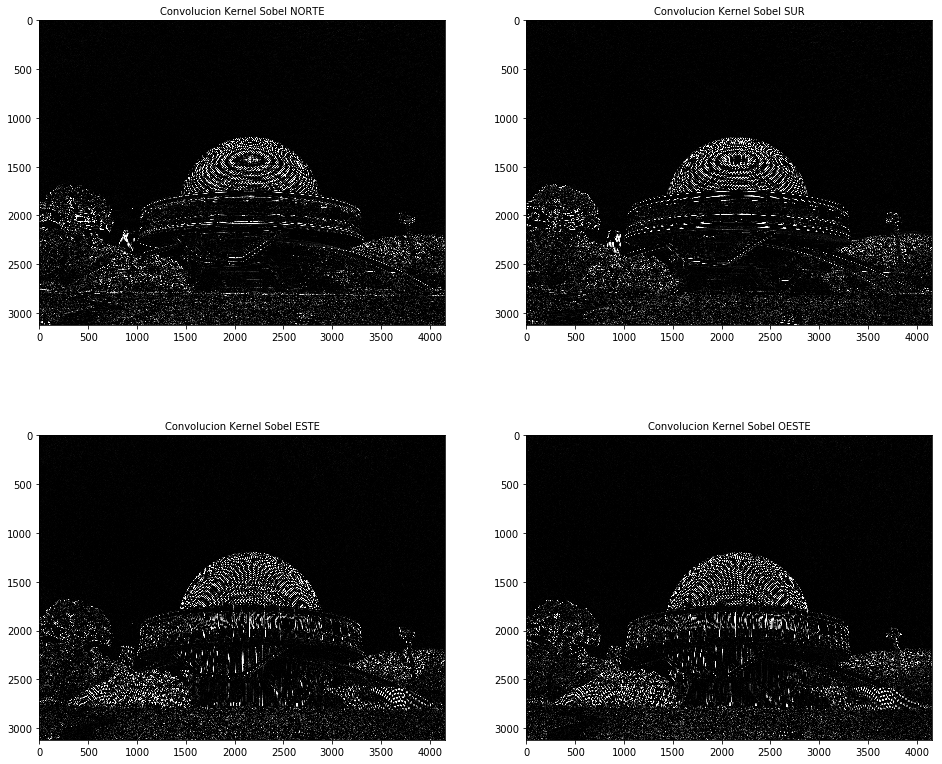

In [220]:
f, axarr = plt.subplots(2,2)
f.set_size_inches(16, 14)
axarr[0,0].imshow(img1_conv_sobel_norte, cmap=plt.cm.gray)
axarr[0,0].set_title("Convolucion Kernel Sobel NORTE", fontsize=10)
axarr[0,1].imshow(img1_conv_sobel_sur, cmap=plt.cm.gray)
axarr[0,1].set_title("Convolucion Kernel Sobel SUR", fontsize=10)
axarr[1,0].imshow(img1_conv_sobel_este, cmap=plt.cm.gray)
axarr[1,0].set_title("Convolucion Kernel Sobel ESTE", fontsize=10)
axarr[1,1].imshow(img1_conv_sobel_oeste, cmap=plt.cm.gray)
axarr[1,1].set_title("Convolucion Kernel Sobel OESTE", fontsize=10)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[1,0].grid(False)
axarr[1,1].grid(False)
plt.show()

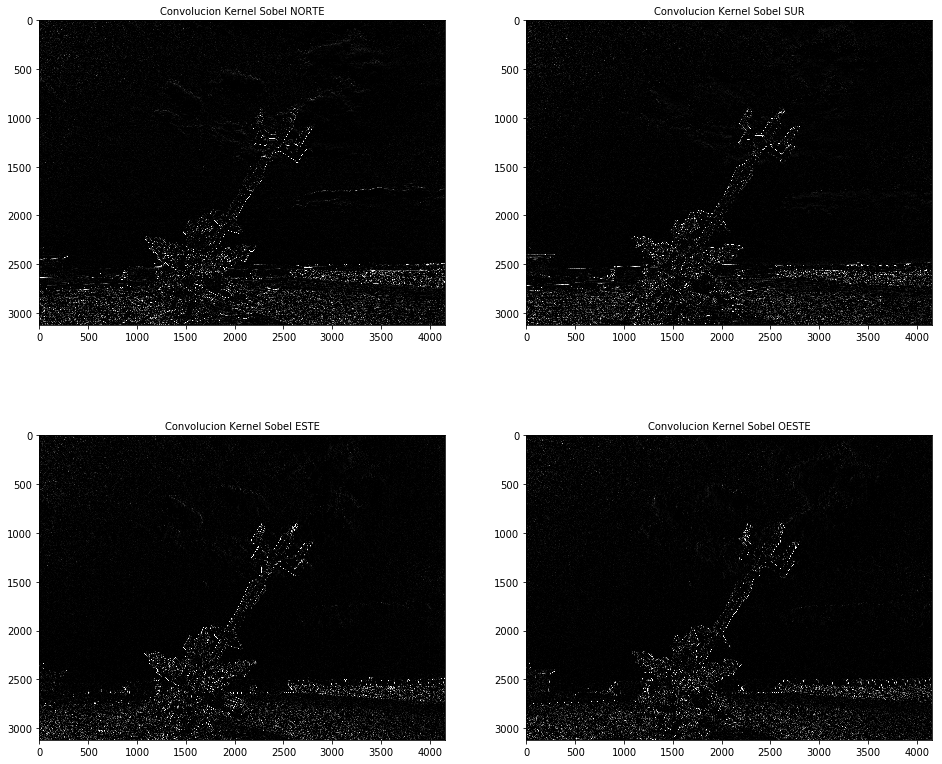

In [235]:
f, axarr = plt.subplots(2,2)
f.set_size_inches(16, 14)
axarr[0,0].imshow(img2_conv_sobel_norte, cmap=plt.cm.gray)
axarr[0,0].set_title("Convolucion Kernel Sobel NORTE", fontsize=10)
axarr[0,1].imshow(img2_conv_sobel_sur, cmap=plt.cm.gray)
axarr[0,1].set_title("Convolucion Kernel Sobel SUR", fontsize=10)
axarr[1,0].imshow(img2_conv_sobel_este, cmap=plt.cm.gray)
axarr[1,0].set_title("Convolucion Kernel Sobel ESTE", fontsize=10)
axarr[1,1].imshow(img2_conv_sobel_oeste, cmap=plt.cm.gray)
axarr[1,1].set_title("Convolucion Kernel Sobel OESTE", fontsize=10)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[1,0].grid(False)
axarr[1,1].grid(False)
plt.show()

Imprimimos en pantalla las imagenes originales y sus correspondientes luego de aplicar el filtro Sobel diagonal para las 2 imagenes.

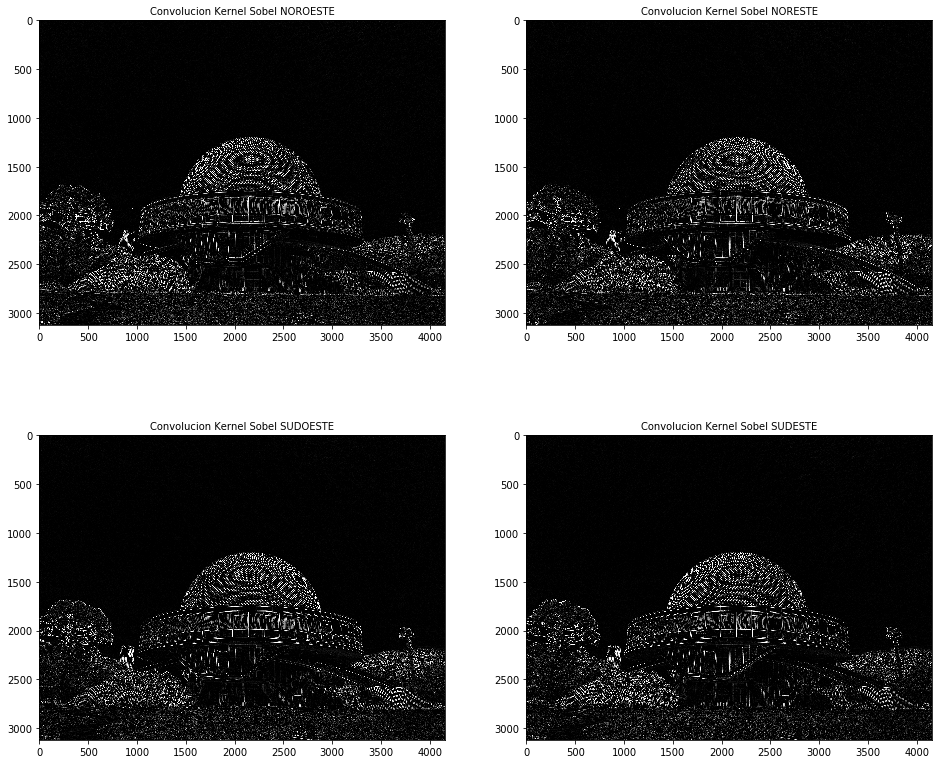

In [224]:
f, axarr = plt.subplots(2,2)
f.set_size_inches(16, 14)
axarr[0,0].imshow(img1_conv_sobel_no, cmap=plt.cm.gray)
axarr[0,0].set_title("Convolucion Kernel Sobel NOROESTE", fontsize=10)
axarr[0,1].imshow(img1_conv_sobel_ne, cmap=plt.cm.gray)
axarr[0,1].set_title("Convolucion Kernel Sobel NORESTE", fontsize=10)
axarr[1,0].imshow(img1_conv_sobel_so, cmap=plt.cm.gray)
axarr[1,0].set_title("Convolucion Kernel Sobel SUDOESTE", fontsize=10)
axarr[1,1].imshow(img1_conv_sobel_se, cmap=plt.cm.gray)
axarr[1,1].set_title("Convolucion Kernel Sobel SUDESTE", fontsize=10)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[1,0].grid(False)
axarr[1,1].grid(False)
plt.show()

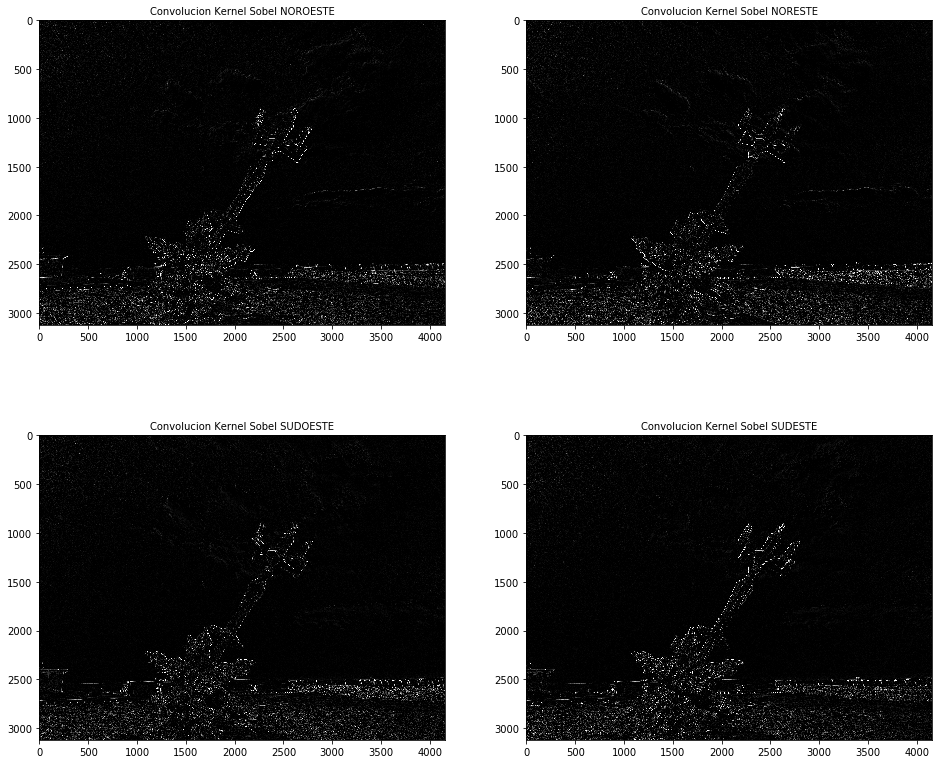

In [222]:
f, axarr = plt.subplots(2,2)
f.set_size_inches(16, 14)
axarr[0,0].imshow(img2_conv_sobel_no, cmap=plt.cm.gray)
axarr[0,0].set_title("Convolucion Kernel Sobel NOROESTE", fontsize=10)
axarr[0,1].imshow(img2_conv_sobel_ne, cmap=plt.cm.gray)
axarr[0,1].set_title("Convolucion Kernel Sobel NORESTE", fontsize=10)
axarr[1,0].imshow(img2_conv_sobel_so, cmap=plt.cm.gray)
axarr[1,0].set_title("Convolucion Kernel Sobel SUDOESTE", fontsize=10)
axarr[1,1].imshow(img2_conv_sobel_se, cmap=plt.cm.gray)
axarr[1,1].set_title("Convolucion Kernel Sobel SUDESTE", fontsize=10)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[1,0].grid(False)
axarr[1,1].grid(False)
plt.show()

# Pasabanda diferencia de filtros de Gauss (3x3 - 5x5)

Definimos el kernel mediante la resta del filtro de Gauss 3x3 con 5x5.

In [243]:
gauss3 = np.zeros((5,5))
gauss3[1:4,1:4] = kernel_gaussian(3)
dif_gauss = gauss3 - kernel_gaussian(5)

Imprimimos una muestra del filtro compuesto

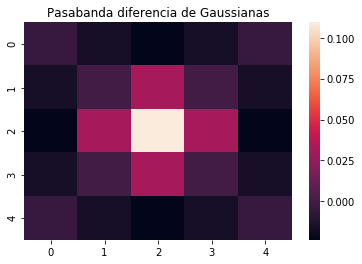

In [251]:
sns.heatmap(dif_gauss)
plt.title("Pasabanda diferencia de Gaussianas")
plt.show()

Aplicamos el filtro Pasabanda por convolucion

In [250]:
img1_dif_gauss = convolucion(img1, dif_gauss)
img2_dif_gauss = convolucion(img2, dif_gauss)

In [253]:
# coercionamos los valores de los pixeles entre 0 y 1

img1_dif_gauss[img1_dif_gauss[:,:] >1] = 1
img1_dif_gauss[img1_dif_gauss[:,:] <0] = 0
img2_dif_gauss[img2_dif_gauss[:,:] >1] = 1
img2_dif_gauss[img2_dif_gauss[:,:] <0] = 0

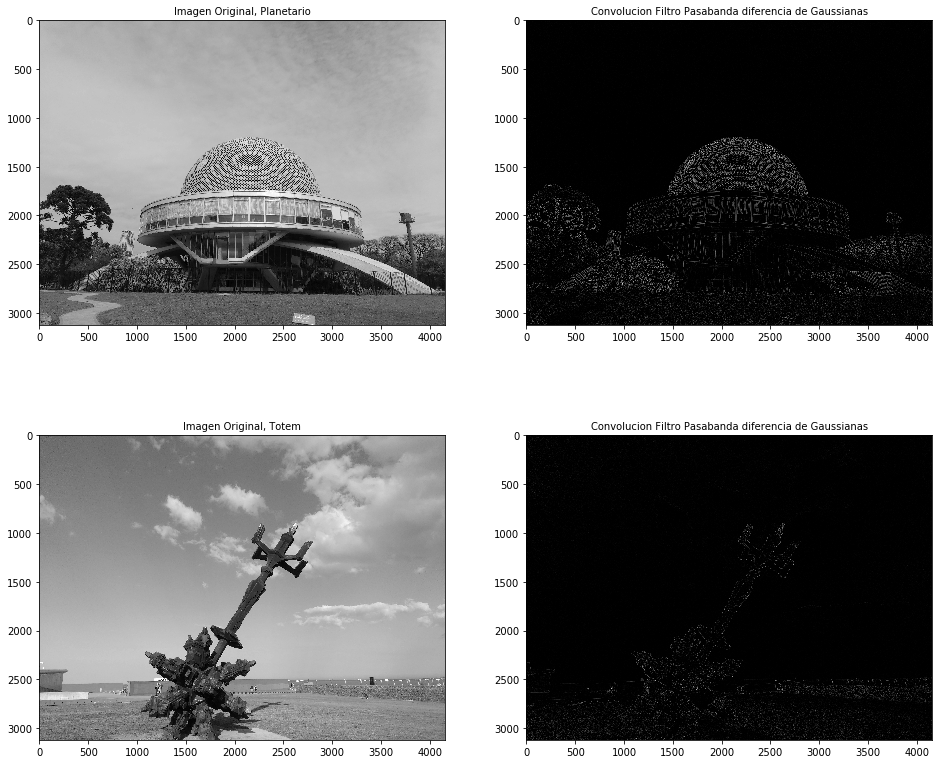

In [255]:
f, axarr = plt.subplots(2,2)
f.set_size_inches(16, 14)
axarr[0,0].imshow(img1, cmap=plt.cm.gray)
axarr[0,0].set_title("Imagen Original, Planetario", fontsize=10)
axarr[0,1].imshow(img1_dif_gauss, cmap=plt.cm.gray)
axarr[0,1].set_title("Convolucion Filtro Pasabanda diferencia de Gaussianas", fontsize=10)
axarr[1,0].imshow(img2, cmap=plt.cm.gray)
axarr[1,0].set_title("Imagen Original, Totem", fontsize=10)
axarr[1,1].imshow(img2_dif_gauss, cmap=plt.cm.gray)
axarr[1,1].set_title("Convolucion Filtro Pasabanda diferencia de Gaussianas", fontsize=10)
axarr[0,1].grid(False)
axarr[0,0].grid(False)
axarr[1,0].grid(False)
axarr[1,1].grid(False)
plt.show()